UNO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [28]:
imagen = Image.open(r"C:\Users\50233\OneDrive - Universidad Galileo\Escritorio\BECA 2022\CURSOS 2023\3ER. TRIMESTRE\TEXT MINING\LABORATORIOS\img.jpg")
imagen.show()

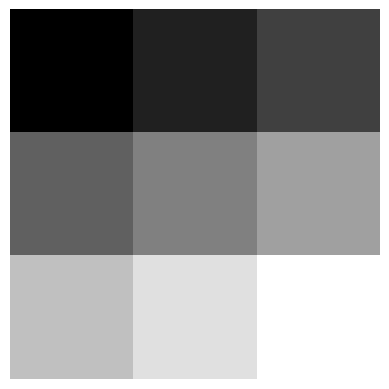

In [32]:
def mostrarimagenesgrises3d(imagenes):
    fig = plt.figure()
    for i in range(len(imagenes)):
        ax = fig.add_subplot(1, len(imagenes), i+1)
        ax.imshow(imagenes[i], cmap='gray')
        ax.axis('off')
    plt.show()

imagen = [np.array([[10, 20, 30],
                    [40, 50, 60],
                    [70, 80, 90]])]

mostrarimagenesgrises3d(imagen)


DOS

In [33]:
def negativa(image):
    # Cambiar la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Obtener la imagen negativa
    negative_image = 255 - gray_image
    return negative_image

In [34]:
def transformacion_lineal(image, slope, intercept):
    # Aplicar la transformación lineal a la imagen
    transformed_image = slope * image + intercept
    # Limitar los valores de píxel a 0 y 255
    transformed_image = np.clip(transformed_image, 0, 255)
    # Convertir la imagen de nuevo a tipo de datos entero sin signo de 8 bits
    transformed_image = transformed_image.astype(np.uint8)
    return transformed_image

In [35]:
def transformacion_logaritmica(image, c):
    # Aplicar la transformación logarítmica a la imagen
    transformed_image = c * np.log(1 + image)
    # Limitar los valores de píxel a 0 y 255
    transformed_image = np.clip(transformed_image, 0, 255)
    # Convertir la imagen de nuevo a tipo de datos entero sin signo de 8 bits
    transformed_image = transformed_image.astype(np.uint8)
    return transformed_image

In [36]:
def transformacion_exponencial(image, c, gamma):
    # Aplicar la transformación exponencial a la imagen
    transformed_image = c * np.power(image, gamma)
    # Limitar los valores de píxel a 0 y 255
    transformed_image = np.clip(transformed_image, 0, 255)
    # Convertir la imagen de nuevo a tipo de datos entero sin signo de 8 bits
    transformed_image = transformed_image.astype(np.uint8)
    return transformed_image

TRES

In [52]:
def operaciones_imagenes(img1, img2):
    # Verificar si las imágenes tienen el mismo tamaño
    if img1.shape != img2.shape:
        print("Las imágenes no tienen el mismo tamaño")
        return

    # Convertir las imágenes a escala de grises
    imagen1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    imagen2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Binarizar las imágenes
    _, imagen1_bin = cv2.threshold(imagen1_gray, 127, 255, cv2.THRESH_BINARY)
    _, imagen2_bin = cv2.threshold(imagen2_gray, 127, 255, cv2.THRESH_BINARY)

    # Suma de imágenes
    suma_imagenes = cv2.add(imagen1_gray, imagen2_gray)

    # Resta de imágenes
    resta_imagenes = cv2.subtract(imagen1_gray, imagen2_gray)

    # Operación lógica AND
    and_imagenes = cv2.bitwise_and(imagen1_bin, imagen2_bin)

    # Operación lógica OR
    or_imagenes = cv2.bitwise_or(imagen1_bin, imagen2_bin)

    # Operación lógica XOR
    xor_imagenes = cv2.bitwise_xor(imagen1_bin, imagen2_bin)

    # Mostrar las imágenes resultantes
    cv2.imshow("Suma", suma_imagenes)
    cv2.imshow("Resta", resta_imagenes)
    cv2.imshow("AND", and_imagenes)
    cv2.imshow("OR", or_imagenes)
    cv2.imshow("XOR", xor_imagenes)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [56]:
imagen1 = cv2.imread("img1.png")
imagen2 = cv2.imread("img2.png")

# Llamar a la función para realizar las operaciones
operaciones_imagenes(imagen1, imagen2)

Las imágenes no tienen el mismo tamaño


CINCO

In [ ]:
imagen = cv2.imread('img2.png')

kernelgaussiano = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32) / 16
imagen_filtrada_gaussiano = cv2.filter2D(imagen, -1, kernelgaussiano)

kernelbox = np.ones((3, 3), dtype=np.float32) / 9
imagen_filtrada_box = cv2.filter2D(imagen, -1, kernelbox)

imagen_filtrada_median = cv2.medianBlur(imagen, 3)

imagen_en_grises = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
gradientex = cv2.Sobel(imagen_en_grises, cv2.CV_64F, 1, 0, ksize=3)
gradientey = cv2.Sobel(imagen_en_grises, cv2.CV_64F, 0, 1, ksize=3)
imagen_filtrada_sobel = cv2.addWeighted(gradientex, 0.5, gradientey, 0.5, 0)

kernellaplaciano = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float32)
imagen_filtrada_laplaciano = cv2.filter2D(imagen_en_grises, -1, kernellaplaciano)

kernelrealce = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
imagen_filtrada_realce = cv2.filter2D(imagen, -1, kernelrealce)

kernelembossing = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]], dtype=np.float32)
imagen_filtrada_embossing = cv2.filter2D(imagen, -1, kernelembossing)

# Mostrar la imagen original y filtrada:
cv2.imshow('Imagen Original', imagen)
cv2.imshow('Imagen Filtrada Gaussiano', imagen_filtrada_gaussiano)
cv2.imshow('Imagen Filtrada Box', imagen_filtrada_box)
cv2.imshow('Imagen Filtrada Median', imagen_filtrada_median)
cv2.imshow('Imagen Filtrada Sobel', imagen_filtrada_sobel)
cv2.imshow('Imagen Filtrada Laplaciano', imagen_filtrada_laplaciano)
cv2.imshow('Imagen Filtrada Realce', imagen_filtrada_realce)
cv2.imshow('Imagen Filtrada Embossing', imagen_filtrada_embossing)
cv2.waitKey(0)
cv2.destroyAllWindows()

CUATRO

In [ ]:
imagen = cv2.imread("r"C:\Users\50233\OneDrive - Universidad Galileo\Escritorio\BECA 2022\CURSOS 2023\3ER. TRIMESTRE\TEXT MINING\LABORATORIOS\img.jpg"", 0)
canny = cv2.Canny(imagen, umbral_minimo, umbral_maximo)
sobel_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=tamaño_kernel)
sobel_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=tamaño_kernel)
sobel = cv2.magnitude(sobel_x, sobel_y)
laplacian = cv2.Laplacian(imagen, cv2.CV_64F)
plt.subplot(2, 2, 1), plt.imshow(imagen, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(canny, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobel, cmap='gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(laplacian, cmap='gray')
plt.title('Laplaciano'), plt.xticks([]), plt.yticks([])

plt.show()
